# Logistic Regression
# Prepared by: M. Abhijna Prabhu, Manipal Institute of Technology

# Here I'm working with small data set so my accuracy may be 100% since small data sets give misleading infomation this was just for practicing purpose

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data=pd.read_csv('loan_approval_dataset.csv')
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,5000,0,130,360,1,Male,Yes,Graduate,No,Urban,Y
1,3000,1500,100,360,0,Female,No,Graduate,No,Rural,N
2,4000,0,120,360,1,Male,Yes,Not Graduate,Yes,Urban,Y
3,6000,0,150,360,1,Male,Yes,Graduate,No,Semiurban,Y
4,2500,1800,80,180,0,Female,No,Graduate,No,Rural,N
5,7000,2000,200,360,1,Male,Yes,Graduate,Yes,Urban,Y
6,12000,0,250,360,1,Male,Yes,Graduate,No,Semiurban,Y
7,3500,0,90,360,1,Female,No,Not Graduate,No,Rural,N
8,8000,2500,180,360,1,Male,Yes,Graduate,Yes,Urban,Y
9,4500,0,110,360,0,Female,No,Not Graduate,No,Semiurban,N


In [33]:
#changing the names of the tale for convineence

data.columns=['appli_income','co_appli_income','loan_amt','loan_amt_term','credit_score','gender','married','education','self_employed','property_area','loan_status']
data.head()

,appli_income,co_appli_income,loan_amt,loan_amt_term,credit_score,gender,married,education,self_employed,property_area,loan_status
0,5000,0,130,360,1,Male,Yes,Graduate,No,Urban,Y
1,3000,1500,100,360,0,Female,No,Graduate,No,Rural,N
2,4000,0,120,360,1,Male,Yes,Not Graduate,Yes,Urban,Y
3,6000,0,150,360,1,Male,Yes,Graduate,No,Semiurban,Y
4,2500,1800,80,180,0,Female,No,Graduate,No,Rural,N


Accuracy: 
 1.0
Precision: 
 1.0
Recall: 
 1.0
AUC score: 
 1.0


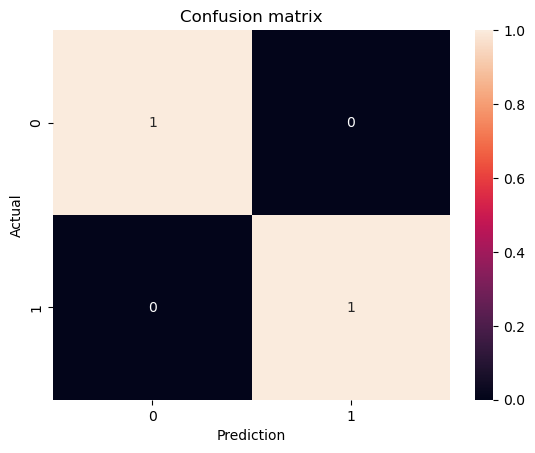

In [40]:
x=data[['appli_income','loan_amt','credit_score']]
y=data['loan_status'].map({'Y':1,'N':0})

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


#training logictic regression model
model=LogisticRegression()
model.fit(x_train_scaled,y_train) 

y_pred=model.predict(x_test_scaled) #we are making predictions here

#evaluation of the model

accuracy=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
auc_score=roc_auc_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)




print("Accuracy: \n",accuracy)
print("Precision: \n",prec)
print("Recall: \n",rec)
print("AUC score: \n",auc_score)


#visualization
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title('Confusion matrix')
plt.show()







## Real-World Kaggle Dataset: Loan Prediction

# In the following cells, we will work with the full Kaggle dataset to predict whether a loan is approved or not using **Logistic Regression**.  
# This dataset is larger and more representative of real-world scenarios, so the model’s performance metrics will be meaningful.  
# We will apply the same workflow: data cleaning, feature scaling, model building, evaluation, and visualization.


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix,  roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv("loan_kaggle.csv")
print(df.isna().sum())
df

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [34]:
#filling tthe missing values and creating a new columns based on the assumed conditions

df['Credit_History']=df['Credit_History'].fillna(0)
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['ApplicantIncome']=df['ApplicantIncome'].fillna(df['ApplicantIncome'].median())

conditions=(
    (df['Credit_History']==1.0)&
    (df['ApplicantIncome']>3000)&
    (df['LoanAmount']<200)
)

df['Loan_Status']=np.where(conditions,1,0)

print(df['Loan_Status'].value_counts())
print()
df #added new column loan status

Loan_Status
0    188
1    179
Name: count, dtype: int64



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,1
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,1
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.0,Semiurban,0
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,1


The accuracy: 
 78.37837837837837
The precision: 
 66.66666666666666
The recall : 
 1.0
AUC score: 
 0.8095238095238095

The classification report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.76        42
           1       0.67      1.00      0.80        32

    accuracy                           0.78        74
   macro avg       0.83      0.81      0.78        74
weighted avg       0.86      0.78      0.78        74



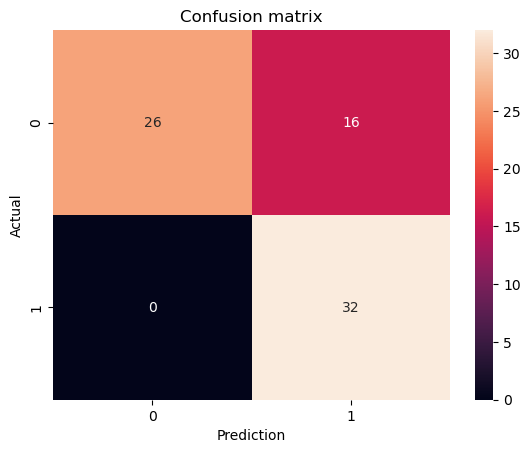

In [37]:
x=df[['ApplicantIncome','Credit_History','LoanAmount']]
y=df['Loan_Status']

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

model=LogisticRegression()
model.fit(x_train_scaled,y_train)

y_pred=model.predict(x_test_scaled)

#Evaluating the model
accu=accuracy_score(y_test, y_pred)
prec=precision_score(y_test, y_pred)
rec=recall_score(y_test, y_pred)
auc_score=roc_auc_score(y_test,y_pred)
classi=classification_report(y_test,y_pred)

print("The accuracy: \n",(accu) *100)
print("The precision: \n",(prec)*100)
print("The recall : \n",rec)
print("AUC score: \n",auc_score)
print()
print("The classification report:\n",classi)


cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

# In real life, this means the model would never reject an eligible person, but might accidentally approve a few risky applicants


True Negatives (TN)	26 people who actually did not get loan (0) were correctly predicted as not approved. 

False Positives (FP)	16 people who actually did not get loan (0) were incorrectly predicted as approved (1). 

False Negatives (FN)	0 people who actually got loan (1) were incorrectly predicted as not approved (0). 

True Positives (TP)	32 people who actually got loan (1) were correctly predicted as approved. 